In [48]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [524]:
def flip_coins(num_coins, num_flips):
    C = np.random.randint(2, size=(num_coins, num_flips)) #bernoulli from scipy. and linalg.pinv
    min_index = np.argmin(np.sum(C, axis=1))
    rand_index = np.random.randint(num_coins)
    # print min_index, rand_index
    v_min = np.sum(C[min_index,:])/float(num_flips)
    v_rand = np.sum(C[rand_index,:])/float(num_flips)
    v_1 = np.sum(C[1,:])/float(num_flips)
    
#     print v_min, v_rand, v_1
    min_sum = np.sum(C[min_index,:])
    rand_sum = np.sum(C[rand_index,:])
    one_sum = np.sum(C[1,:])
    return min_sum, rand_sum, one_sum


In [99]:
def plot_histogram(range, weights, bins):
    plt.hist(range, weights=weights, bins=bins)
    plt.show()

In [528]:
def hoeffding_experiment(num_run_times, num_coins, num_flips):
    min_sum = 0
    rand_sum = 0
    one_sum = 0
    min_sum_hist = np.zeros([num_flips+1,1])
    rand_sum_hist = np.zeros([num_flips+1,1])
    one_sum_hist = np.zeros([num_flips+1,1])
    
    for run_num in xrange(num_run_times):
        min_sum_, rand_sum_, one_sum_ = flip_coins(num_coins, num_flips)
        rand_sum += rand_sum_
        one_sum += one_sum_
        min_sum_hist[min_sum_] += 1
        rand_sum_hist[rand_sum_] += 1
        one_sum_hist[one_sum_] += 1
    
    plot_histogram(range(0,11), weights=rand_sum_hist, bins=11)
    plot_histogram(range(0,11), weights=min_sum_hist, bins=11)
    plot_histogram(range(0,11), weights=one_sum_hist, bins=11)
    print np.mean(min_sum_hist) / (num_run_times * num_flips)
    print "min average: ", min_sum/(float(num_run_times) * num_flips)
    print "one average: ", one_sum/(float(num_run_times) * num_flips)
    print "rand average: ", rand_sum/(float(num_run_times) * num_flips)

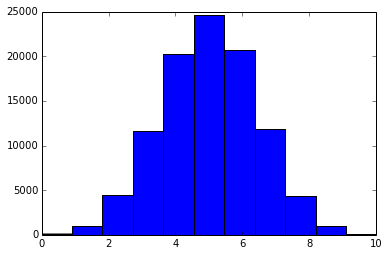

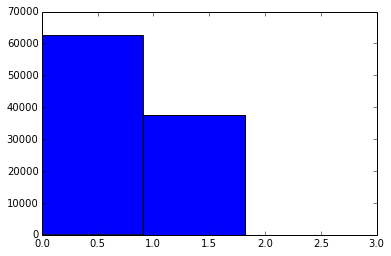

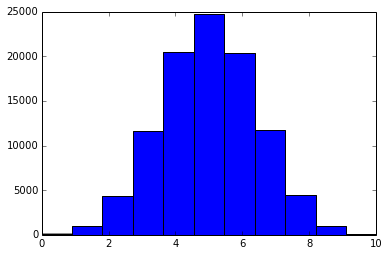

0.00909090909091
min average:  0.0
one average:  0.500426
rand average:  0.500956


In [529]:
num_coins = 1000
num_flips = 10
num_run_times = 100000
min_sum = 0

hoeffding_experiment(num_run_times, num_coins, num_flips)

<h2>Linear Regression</h2>

<h3>Problem 5</h3>

In [512]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import random

from numpy.linalg import inv

def generate_dataset(num_of_points=10):
    X = np.ones((num_of_points, 3)) # these are 1 because of x0 = 1 for the constant term
    X[:, 1:] = np.random.uniform(-1, 1, (num_of_points, 2))
    return X

def classify(X, w):
#     y = np.dot(X,w)
    return 1.*(np.dot(X, w) > 0)
#     return np.sign(np.dot(X, w))

In [517]:
def plot_points(X, coeff, w, y):
    plt.figure(figsize=[12,8])
    x = np.arange(-2, 2, 0.2)
    if coeff is not None:
        plt.plot(x, (-coeff[1]*x - coeff[0])/coeff[2], 'b--')
        plt.plot(x, (-w[1]*x - w[0])/w[2], 'r*-')

    for num in xrange(len(y)):
        if y[num] > 0:
            plt.plot(X[num][1], X[num][2], 'bo')
        else:
            plt.plot(X[num][1], X[num][2], 'ro')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()

In [242]:
def get_average_num_iterations(num_runs=1, num_training_points=10, num_test_points=1000, plot=False):
    num_iteration = 0
    num_prob = 0
    index = 0

    while index < num_runs:
        num_iteration_index, num_prob_index = pla_iterate(num_training_points, num_test_points, plot=plot)
        num_iteration += num_iteration_index
        num_prob += num_prob_index
        index += 1

    return num_iteration/float(num_runs), num_prob/float(num_runs)

def pla_iterate(num_training_points, num_test_points, coeff=None, X=None, w=None, plot=False):
    # create target function and training set
    if coeff is None:
        coeff = np.random.uniform(-1, 1, (3, 1))
    if X is None:
        X = generate_dataset(num_training_points)
    y_true = classify(X, coeff)

    # initialize weights
    if w is None:
        w = np.zeros((3, 1))

    # inputs: X, w, y_true
    (num_iterations, w) = get_weights_pla(X, w, y_true)
    sample_error_prob = get_performance(num_test_points, coeff, w)

    if plot:
        plot_points(X, coeff, w)

    return num_iterations, sample_error_prob

In [239]:
def get_weights_pla(X, w, y_true):
    if X is None or w is None is y_true is None:
        print "X, w, y_true are empty"
        return
    
    num_iterations = 0
    
    while True:
        y = classify(X, w)
        error_indexes = copy.copy(np.where(y != y_true)[0]) # take first element because that contains the indices
  
        if len(error_indexes) > 0:
            np.random.shuffle(error_indexes)
            chosen_index = error_indexes[0]

            chosen_x = X[chosen_index,:]
            chosen_x = chosen_x.reshape(3,1) # need to reshape to create a column vector of these values
            w = w + y_true[chosen_index] * chosen_x

            num_iterations += 1
        else:
            break
    
    return (num_iterations, w)

In [256]:
def get_performance(num_test_points, coeff, w, X_test=None):
    if X_test is None:
        X_test = generate_dataset(num_test_points)
    y_true = classify(X_test, coeff)
    y = classify(X_test, w)
    sample_error_prob = np.sum(y != y_true)/float(num_test_points)
    
    return sample_error_prob

In [257]:
def get_linear_regression_weights(num_training_points, y, X=None):
    if X is None:
        X = generate_dataset(num_training_points)
    
    pseudo_inv_X = np.dot(inv(np.dot(X.T, X)), X.T)
    w = np.dot(pseudo_inv_X, y)
    
    return w

In [500]:
def get_average_sample_error(num_runs, num_training_points, num_test_points, plot=False):
    in_sample_error = 0
    out_sample_error = 0
    iteration = 0
        
    while iteration < num_runs:
        coeff = np.random.uniform(-1, 1, (3, 1))
        
        X = generate_dataset(num_training_points)
        y = classify(X, coeff)
        w = get_linear_regression_weights(num_training_points, y, X)
        y_w = classify(X, w)
        in_sample_error_iteration = np.sum(y != y_w) / float(num_training_points)
        
        if plot:
            plot_points(X, coeff, w, y)

#         X = generate_dataset(num_test_points)
#         y = classify(X, coeff)
#         y_w = classify(X, w)
#         out_sample_error_iteration = np.sum(y != y_w) / float(num_test_points)

        in_sample_error += in_sample_error_iteration
#         out_sample_error += out_sample_error_iteration
        
        iteration += 1
    
#         if plot:
#             plot_points(X, coeff, w, y)
    return (in_sample_error / num_runs, out_sample_error / num_runs)

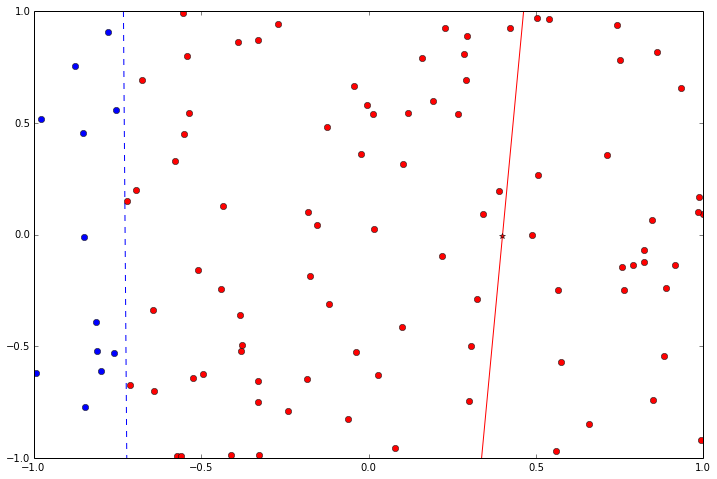

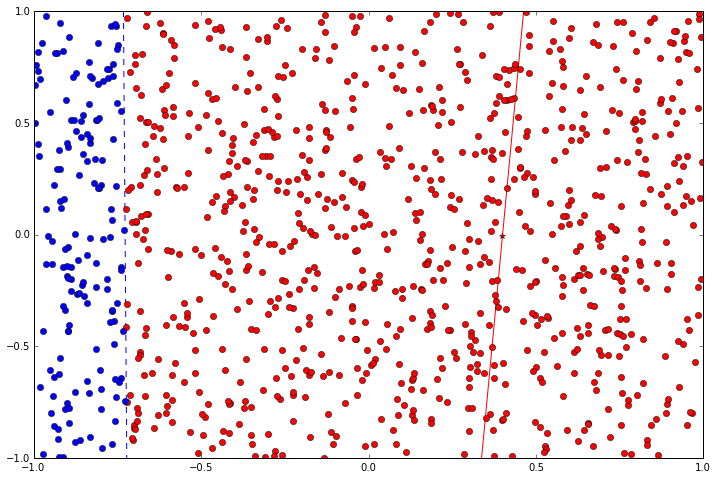

Ein = 0.61000, Eout = 0.56300


In [520]:
(Ein, Eout) = get_average_sample_error(num_runs=1, num_training_points=100, num_test_points=1000, plot=True)
print "Ein = %.5f, Eout = %.5f" % (Ein, Eout) #problem 5 and 6 answer

In [504]:
def pla_iterate_with_lr(num_runs, num_training_points):
    iter = 0
    total_num_iterations = 0
    avg_sample_prob = 0
    
    while iter < num_runs:
        iter += 1
        coeff = np.random.uniform(-1, 1, (3, 1))
        X = generate_dataset(num_training_points)
        y = classify(X, coeff)
        initial_w = get_linear_regression_weights(num_training_points, y, X)
        (num_iterations, sample_prob) = pla_iterate(1000, 10, coeff, X, initial_w, plot=False)
        total_num_iterations += num_iterations
        avg_sample_prob += sample_prob
        
    print "AVERAGE # with initial weights from LR: ", total_num_iterations / float(num_runs)
    print "Probability of Error ", avg_sample_prob/float(num_runs)

In [503]:
pla_iterate_with_lr(num_runs=1000, num_training_points=1000)

AVERAGE # with initial weights from LR:  708.383
Probability of Error  0.0012


In [250]:
average_num, prob_of_error = get_average_num_iterations(num_runs=1000, num_training_points=1000, num_test_points=1000)
print "AVERAGE # ", average_num
print "Probability of Error ", prob_of_error

AVERAGE #  781.051
Probability of Error  0.001134


In [505]:
pla_iterate_with_lr(num_runs=1000, num_training_points=10)

AVERAGE # with initial weights from LR:  2.726
Probability of Error  0.0776


<h5>NOTE: Need to look into these results because it looks like the initial weights don't really help. Weird...</h5>

<h1>Problem 8 - 10</h1>

In [299]:
import random
import copy

def add_noise(y, ratio_affected):
    affected_indices = random.sample(range(0, len(y)), int(ratio_affected * len(y)))
    y_noisy = copy.copy(y)
    y_noisy[affected_indices] *= -1
    
    return y_noisy

In [361]:
def classify_lr(X):
    y = np.sign(np.power(X[:,1], 2) + np.power(X[:,2], 2) - 0.6)

    return y

In [446]:
def get_in_sample_error_lin_feature(num_training_points=1000, ratio_affected=0.1):
    X = generate_dataset(num_training_points)
    y = classify_lr(X)
    y_noisy = add_noise(y, ratio_affected)
    w = get_linear_regression_weights(num_training_points, y_noisy, X)
    
    Ein = np.sum(np.sign(np.dot(X,w)) - y_noisy) / float(num_training_points)
    
#     plot_points(X, None, w, y)
#     plot_points(X, None, w, y_noisy)
        
    return Ein

In [447]:
def get_average_in_sample_error_lin_feature(num_runs, num_training_points, ratio_affected):
    Ein_avg = 0
    for iter in xrange(num_runs):
        Ein_avg += get_in_sample_error_lin_feature(num_training_points, ratio_affected)

    print Ein_avg / num_runs

In [448]:
get_average_in_sample_error_lin_feature(num_runs=1000, num_training_points=1000, ratio_affected=0.1)


0.581666


<h2>Problem 9</h2>

In [321]:
def generate_dataset_nonlinear_feature(X):
    X_nonlin = np.ones((len(X), 6))
    X_nonlin[:,1] = X[:,1]
    X_nonlin[:,2] = X[:,2]
    X_nonlin[:,3] = X[:,1] * X[:,2]
    X_nonlin[:,4] = np.power(X[:,1], 2)
    X_nonlin[:,5] = np.power(X[:,2], 2)
    
    return X_nonlin

In [449]:
for iter in xrange(10):
    num_training_points = 1000
    ratio_affected = 0.10
    X = generate_dataset(num_training_points)
    X_nonlin = generate_dataset_nonlinear_feature(X)
    y = classify_lr(X)
    y_noisy = add_noise(y, ratio_affected)
    w = get_linear_regression_weights(num_training_points, y_noisy, X_nonlin)
    
    print w

[-0.99845856  0.0620922  -0.01773665 -0.0403342   1.5407372   1.59296093]
[-0.98712246  0.00515312 -0.04500681 -0.11433643  1.52353101  1.53542472]
[ -1.01000483e+00   9.11412922e-04   2.57121745e-02   2.06336877e-02
   1.56543211e+00   1.61912158e+00]
[-0.97671412  0.05281048  0.06490659 -0.01531493  1.58228256  1.58464021]
[-0.97432374  0.03458336 -0.0531997   0.01131101  1.57948582  1.52001844]
[-1.00118831 -0.0213631  -0.07167365 -0.02800113  1.44044157  1.63500189]
[-0.95653085  0.01051859 -0.04032545 -0.04911893  1.54480899  1.55848904]
[-1.0112037   0.00672481  0.01614672 -0.02428697  1.50843015  1.60605293]
[ -9.67670243e-01   5.56946719e-02  -2.05343942e-04   2.42067415e-02
   1.50563121e+00   1.54484133e+00]
[-1.00896891 -0.04347294  0.03153246  0.07295235  1.60119536  1.57942882]


<h2>Problem 10</h2>

In [461]:
def get_out_sample_error(num_training_points, num_test_points, ratio_affected):
    X = generate_dataset(num_training_points)
    X_nonlin = generate_dataset_nonlinear_feature(X)
    y = classify_lr(X)
    y_noisy = add_noise(y, ratio_affected)
    w = get_linear_regression_weights(num_training_points, y_noisy, X_nonlin)

    # test set
    X_test = generate_dataset(num_test_points)
    X_test_nonlin = generate_dataset_nonlinear_feature(X_test)
    y = classify_lr(X_test)
    y_noisy = add_noise(y, ratio_affected)
    Eout = np.sum(np.sign(np.dot(X_test_nonlin, w) - y)) / num_test_points
    
    return Eout

In [459]:
def get_average_out_sample_error(num_runs, num_training_points, num_test_points, ratio_affected):
    Eout_avg = 0
    for iter in xrange(num_runs):
        Eout_avg += get_out_sample_error(num_training_points, num_test_points, ratio_affected)
    
    return Eout_avg / num_runs

In [464]:
num_training_points = 1000
num_test_points = 1000
ratio_affected = 0.10
num_runs = 1000
Eout_avg = get_average_out_sample_error(num_runs, num_training_points, num_test_points, ratio_affected)

In [465]:
print Eout_avg

0.110698
